In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks
from sklearn.metrics import mutual_info_score
from matplotlib.pyplot import figure
import matplotlib
import pickle

matplotlib.rc('figure', figsize=(18, 4))

In [3]:

with open("trozo_G_metrics", "rb") as fp:   # Unpickling
    trozo_G_metrics = pickle.load(fp)

with open("trozo_C_metrics", "rb") as fp:   # Unpickling
    trozo_C_metrics = pickle.load(fp)

with open("trozo_R_metrics", "rb") as fp:   # Unpickling
    trozo_R_metrics = pickle.load(fp)

In [4]:
[key for key in trozo_G_metrics]

['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8']

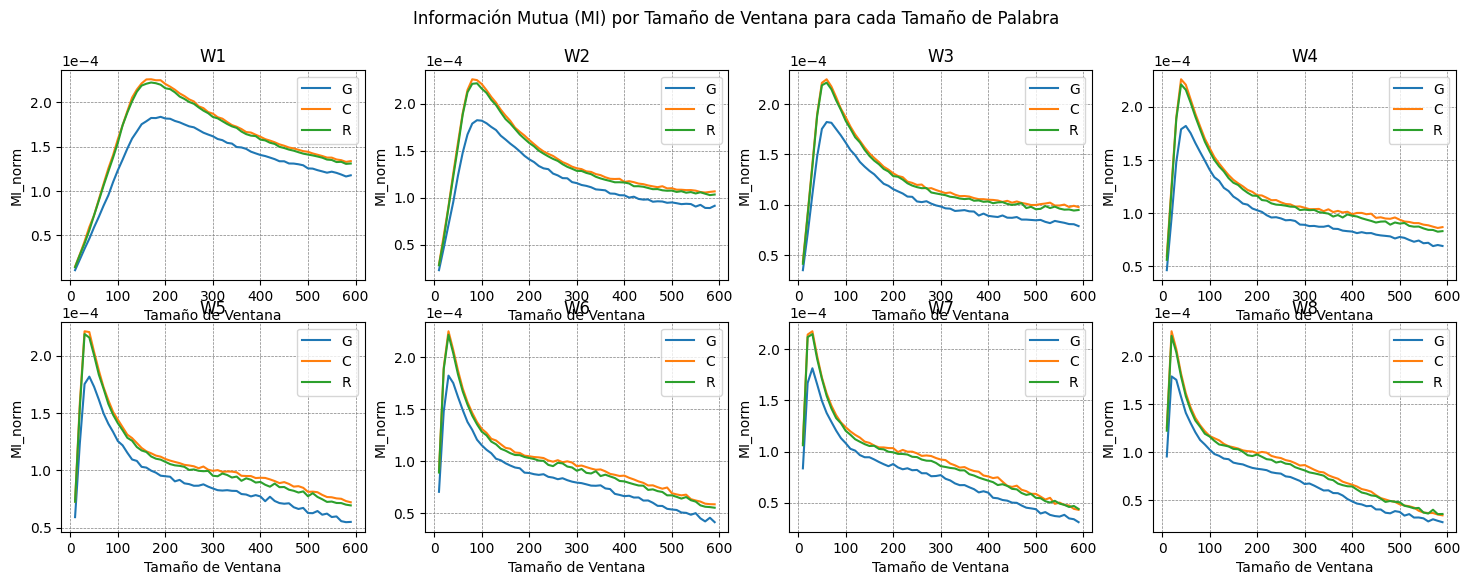

In [5]:
n_rows = 2
n_cols = 4
keys = [key for key in trozo_G_metrics]

fig, axs = plt.subplots(n_rows, n_cols)
n_plots = 0
fig.suptitle('Información Mutua (MI) por Tamaño de Ventana para cada Tamaño de Palabra')
for r in range(n_rows):
    for c in range(n_cols):
        df_G = trozo_G_metrics[keys[n_plots]]
        df_C = trozo_C_metrics[keys[n_plots]]
        df_R = trozo_R_metrics[keys[n_plots]]

        axs[r, c].plot(df_G['WindSize'], df_G['MI_norm'], label = 'G')
        axs[r, c].plot(df_C['WindSize'], df_C['MI_norm'], label = 'C')
        axs[r, c].plot(df_R['WindSize'], df_R['MI_norm'], label = 'R')
        axs[r, c].set_title(keys[n_plots])
        axs[r, c].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
        axs[r, c].legend()
        axs[r, c].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


        n_plots+=1

for ax in axs.flat:
    ax.set(xlabel='Tamaño de Ventana', ylabel='MI_norm')

# for ax in axs.flat:
#     ax.label_outer()

fig.set_size_inches(18, 6)